In [1]:
#importing required packages

#for text
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
from string  import punctuation
from nltk.collocations import *
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
from nltk.probability  import FreqDist
from heapq import nlargest
from collections import defaultdict


#for donwload the webpage

import requests
import webbrowser
from bs4 import BeautifulSoup
import httplib2
import httpbin
import requests
import httplib2
import urllib
import pandas as pd
import numpy as np
import webbrowser
from pprint import pprint
import json 

#for sentiments analysis

import twitter
import json
from collections import Counter
import os 
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package vader_lexicon to C:\Users\Alejandro
[nltk_data]     Perez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# URL

In [3]:
autanaprojects_url = 'https://autanaprojects.com/'
autanaprojects_url_advertising = 'https://btbwagency.com/online-advertising/'
autanaprojects_url_training = 'https://btbwagency.com/product-category/online-training-sessions/'
autanaprojects_url_about = 'https://btbwagency.com/about-us/'
autanaprojects_url_sustainability = 'https://btbwagency.com/sustainability/'

In [4]:
http = httplib2.Http()

In [5]:
#autanaprojects_urls = ['https://autanaprojects.com/', 'https://btbwagency.com/online-advertising/', 'https://btbwagency.com/product-category/online-training-sessions/', 'https://btbwagency.com/about-us/', 'https://btbwagency.com/sustainability/']

In [6]:

resp_autanaprojects, data_autanaprojects = http.request(autanaprojects_url)
autanaprojects_html = data_autanaprojects.decode('UTF-8')
soup_autanaprojects = BeautifulSoup(autanaprojects_html)



cells = soup_autanaprojects.find_all(['p', 'span', 'h1', 'h2', 'h3', 'h4', 'li' 'ul'])
for cell in cells:
    print(cell.text.strip())


Consultoría Turística
AUTANA PROJECTS | Consultoría estratégica en planificación y gestión de proyectos turísticos
Bajo la cabecera

HOME

CONSULTORÍA TURÍSTICA

Alternar menú

PLANIFICACIÓN TURÍSTICA
PROYECTOS HOTEL – CASA RURAL
IDENTIFICACIÓN DE OPORTUNIDADES DE NEGOCIOS
MEDIOAMBIENTE Y SOSTENIBILIDAD
CALIDAD TURÍSTICA
PRODUCTO TURÍSTICO

Alternar menú

DISEÑO DE RUTAS TURÍSTICAS
DISEÑO DE RUTAS Y SENDEROS
MUSEOS Y CENTROS DE VISITANTES
SEÑALIZACIÓN TURÍSTICA
MARKETING TURÍSTICO

Alternar menú

Creación de páginas Web para hoteles y casas rurales
Aplicaciones móviles para la promoción turística
Geocaching o Gymkhana GPS
Guía Geolocalizada de un Museo-Exposición
FORMACIÓN TURÍSTICA

Alternar menú

Cursos turismo
SUBVENCIONES

Alternar menú

Subvecciones sector turismo
NOSOTROS

Alternar menú

Autana Projects
Misión-Visión
Ventajas Competitivas
Nuestra aventura empresarial
Equipo Humano
Partnerships
Nuestros Clientes
BLOG

HABLEMOS


Consultoría Turística
AUTANA PROJECTS | Consultoría

In [7]:
text = ' '.join(map(lambda p: p.text, soup_autanaprojects.find_all(['p', 'span', 'h1', 'h2', 'h3', 'h4', 'li' 'ul'])))
text

' \n\r\n\t\t\t\t\tConsultoría Turística \r\n\t\t\t\t\n \r\n\t\t\t\t AUTANA PROJECTS | Consultoría estratégica en planificación y gestión de proyectos turísticos\r\n\t\t\t Bajo la cabecera  HOME  CONSULTORÍA TURÍSTICA  Alternar menú  PLANIFICACIÓN TURÍSTICA PROYECTOS HOTEL – CASA RURAL IDENTIFICACIÓN DE OPORTUNIDADES DE NEGOCIOS MEDIOAMBIENTE Y SOSTENIBILIDAD CALIDAD TURÍSTICA PRODUCTO TURÍSTICO  Alternar menú  DISEÑO DE RUTAS TURÍSTICAS DISEÑO DE RUTAS Y SENDEROS MUSEOS Y CENTROS DE VISITANTES SEÑALIZACIÓN TURÍSTICA MARKETING TURÍSTICO  Alternar menú  Creación de páginas Web para hoteles y casas rurales Aplicaciones móviles para la promoción turística Geocaching o Gymkhana GPS Guía Geolocalizada de un Museo-Exposición FORMACIÓN TURÍSTICA  Alternar menú  Cursos turismo SUBVENCIONES  Alternar menú  Subvecciones sector turismo NOSOTROS  Alternar menú  Autana Projects Misión-Visión Ventajas Competitivas Nuestra aventura empresarial Equipo Humano Partnerships Nuestros Clientes BLOG  HABLEMO

In [8]:
text.encode('ascii', errors='replace').replace(b"?", b" ")

b' \n\r\n\t\t\t\t\tConsultor a Tur stica \r\n\t\t\t\t\n \r\n\t\t\t\t AUTANA PROJECTS | Consultor a estrat gica en planificaci n y gesti n de proyectos tur sticos\r\n\t\t\t Bajo la cabecera  HOME  CONSULTOR A TUR STICA  Alternar men   PLANIFICACI N TUR STICA PROYECTOS HOTEL   CASA RURAL IDENTIFICACI N DE OPORTUNIDADES DE NEGOCIOS MEDIOAMBIENTE Y SOSTENIBILIDAD CALIDAD TUR STICA PRODUCTO TUR STICO  Alternar men   DISE O DE RUTAS TUR STICAS DISE O DE RUTAS Y SENDEROS MUSEOS Y CENTROS DE VISITANTES SE ALIZACI N TUR STICA MARKETING TUR STICO  Alternar men   Creaci n de p ginas Web para hoteles y casas rurales Aplicaciones m viles para la promoci n tur stica Geocaching o Gymkhana GPS Gu a Geolocalizada de un Museo-Exposici n FORMACI N TUR STICA  Alternar men   Cursos turismo SUBVENCIONES  Alternar men   Subvecciones sector turismo NOSOTROS  Alternar men   Autana Projects Misi n-Visi n Ventajas Competitivas Nuestra aventura empresarial Equipo Humano Partnerships Nuestros Clientes BLOG  HABLEM

In [9]:
sents = sent_tokenize(text)
sents

[' \n\r\n\t\t\t\t\tConsultoría Turística \r\n\t\t\t\t\n \r\n\t\t\t\t AUTANA PROJECTS | Consultoría estratégica en planificación y gestión de proyectos turísticos\r\n\t\t\t Bajo la cabecera  HOME  CONSULTORÍA TURÍSTICA  Alternar menú  PLANIFICACIÓN TURÍSTICA PROYECTOS HOTEL – CASA RURAL IDENTIFICACIÓN DE OPORTUNIDADES DE NEGOCIOS MEDIOAMBIENTE Y SOSTENIBILIDAD CALIDAD TURÍSTICA PRODUCTO TURÍSTICO  Alternar menú  DISEÑO DE RUTAS TURÍSTICAS DISEÑO DE RUTAS Y SENDEROS MUSEOS Y CENTROS DE VISITANTES SEÑALIZACIÓN TURÍSTICA MARKETING TURÍSTICO  Alternar menú  Creación de páginas Web para hoteles y casas rurales Aplicaciones móviles para la promoción turística Geocaching o Gymkhana GPS Guía Geolocalizada de un Museo-Exposición FORMACIÓN TURÍSTICA  Alternar menú  Cursos turismo SUBVENCIONES  Alternar menú  Subvecciones sector turismo NOSOTROS  Alternar menú  Autana Projects Misión-Visión Ventajas Competitivas Nuestra aventura empresarial Equipo Humano Partnerships Nuestros Clientes BLOG  HABLEM

In [10]:
word_sent = word_tokenize(text.lower())
word_sent

['consultoría',
 'turística',
 'autana',
 'projects',
 '|',
 'consultoría',
 'estratégica',
 'en',
 'planificación',
 'y',
 'gestión',
 'de',
 'proyectos',
 'turísticos',
 'bajo',
 'la',
 'cabecera',
 'home',
 'consultoría',
 'turística',
 'alternar',
 'menú',
 'planificación',
 'turística',
 'proyectos',
 'hotel',
 '–',
 'casa',
 'rural',
 'identificación',
 'de',
 'oportunidades',
 'de',
 'negocios',
 'medioambiente',
 'y',
 'sostenibilidad',
 'calidad',
 'turística',
 'producto',
 'turístico',
 'alternar',
 'menú',
 'diseño',
 'de',
 'rutas',
 'turísticas',
 'diseño',
 'de',
 'rutas',
 'y',
 'senderos',
 'museos',
 'y',
 'centros',
 'de',
 'visitantes',
 'señalización',
 'turística',
 'marketing',
 'turístico',
 'alternar',
 'menú',
 'creación',
 'de',
 'páginas',
 'web',
 'para',
 'hoteles',
 'y',
 'casas',
 'rurales',
 'aplicaciones',
 'móviles',
 'para',
 'la',
 'promoción',
 'turística',
 'geocaching',
 'o',
 'gymkhana',
 'gps',
 'guía',
 'geolocalizada',
 'de',
 'un',
 'museo-e

In [11]:
constomStopWords = set(stopwords.words('spanish') + list(punctuation))

constomStopWords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste

In [12]:
word_sent=[word for word in word_sent if word not in constomStopWords]
word_sent

['consultoría',
 'turística',
 'autana',
 'projects',
 'consultoría',
 'estratégica',
 'planificación',
 'gestión',
 'proyectos',
 'turísticos',
 'bajo',
 'cabecera',
 'home',
 'consultoría',
 'turística',
 'alternar',
 'menú',
 'planificación',
 'turística',
 'proyectos',
 'hotel',
 '–',
 'casa',
 'rural',
 'identificación',
 'oportunidades',
 'negocios',
 'medioambiente',
 'sostenibilidad',
 'calidad',
 'turística',
 'producto',
 'turístico',
 'alternar',
 'menú',
 'diseño',
 'rutas',
 'turísticas',
 'diseño',
 'rutas',
 'senderos',
 'museos',
 'centros',
 'visitantes',
 'señalización',
 'turística',
 'marketing',
 'turístico',
 'alternar',
 'menú',
 'creación',
 'páginas',
 'web',
 'hoteles',
 'casas',
 'rurales',
 'aplicaciones',
 'móviles',
 'promoción',
 'turística',
 'geocaching',
 'gymkhana',
 'gps',
 'guía',
 'geolocalizada',
 'museo-exposición',
 'formación',
 'turística',
 'alternar',
 'menú',
 'cursos',
 'turismo',
 'subvenciones',
 'alternar',
 'menú',
 'subvecciones',
 's

In [31]:
noWords = ['”', '“', '·' , '«', '»',  '–', 'and', '1', '2', '7', '100', '...', '``', '’', '48', '‘', '…' , 's.l', 'menú', '\r','\n' ]
freq_list = [word for word in word_sent if word not in noWords]
freq_list

['consultoría',
 'turística',
 'autana',
 'projects',
 'consultoría',
 'estratégica',
 'planificación',
 'gestión',
 'proyectos',
 'turísticos',
 'bajo',
 'cabecera',
 'home',
 'consultoría',
 'turística',
 'alternar',
 'planificación',
 'turística',
 'proyectos',
 'hotel',
 'casa',
 'rural',
 'identificación',
 'oportunidades',
 'negocios',
 'medioambiente',
 'sostenibilidad',
 'calidad',
 'turística',
 'producto',
 'turístico',
 'alternar',
 'diseño',
 'rutas',
 'turísticas',
 'diseño',
 'rutas',
 'senderos',
 'museos',
 'centros',
 'visitantes',
 'señalización',
 'turística',
 'marketing',
 'turístico',
 'alternar',
 'creación',
 'páginas',
 'web',
 'hoteles',
 'casas',
 'rurales',
 'aplicaciones',
 'móviles',
 'promoción',
 'turística',
 'geocaching',
 'gymkhana',
 'gps',
 'guía',
 'geolocalizada',
 'museo-exposición',
 'formación',
 'turística',
 'alternar',
 'cursos',
 'turismo',
 'subvenciones',
 'alternar',
 'subvecciones',
 'sector',
 'turismo',
 'alternar',
 'autana',
 'proje

In [32]:
freq = FreqDist(freq_list)
freq

FreqDist({'turismo': 39, 'turística': 35, 'turísticos': 20, 'turístico': 17, 'curso': 16, 'gestión': 15, 'rural': 15, 'productos': 13, 'alternar': 12, 'consultoría': 11, ...})

In [33]:
nlargest(10, freq_list, key=freq.get)

['turismo',
 'turismo',
 'turismo',
 'turismo',
 'turismo',
 'turismo',
 'turismo',
 'turismo',
 'turismo',
 'turismo']

In [34]:
ranking = defaultdict(int)

for i,sent in enumerate(sents):
    for w in word_tokenize(sent.lower()):
        if w in freq:
            ranking[i] += freq[w]
            
ranking

defaultdict(int,
            {0: 1686,
             1: 88,
             2: 104,
             3: 47,
             4: 104,
             5: 221,
             6: 189,
             7: 98,
             8: 53,
             9: 169,
             10: 43,
             11: 92,
             12: 43,
             13: 92,
             14: 43,
             15: 267,
             16: 96,
             17: 116,
             18: 1852,
             19: 94,
             20: 242,
             21: 39,
             22: 96,
             23: 344,
             24: 140,
             25: 29,
             26: 180,
             27: 15,
             28: 336,
             29: 150,
             30: 57,
             31: 237,
             32: 3,
             33: 48,
             34: 54,
             35: 39,
             36: 4})

In [35]:
sents_idx = nlargest(4, ranking, key=ranking.get)
sents_idx

[18, 0, 23, 28]

In [36]:
[sents[j] for j in sorted(sents_idx)]

[' \n\r\n\t\t\t\t\tConsultoría Turística \r\n\t\t\t\t\n \r\n\t\t\t\t AUTANA PROJECTS | Consultoría estratégica en planificación y gestión de proyectos turísticos\r\n\t\t\t Bajo la cabecera  HOME  CONSULTORÍA TURÍSTICA  Alternar menú  PLANIFICACIÓN TURÍSTICA PROYECTOS HOTEL – CASA RURAL IDENTIFICACIÓN DE OPORTUNIDADES DE NEGOCIOS MEDIOAMBIENTE Y SOSTENIBILIDAD CALIDAD TURÍSTICA PRODUCTO TURÍSTICO  Alternar menú  DISEÑO DE RUTAS TURÍSTICAS DISEÑO DE RUTAS Y SENDEROS MUSEOS Y CENTROS DE VISITANTES SEÑALIZACIÓN TURÍSTICA MARKETING TURÍSTICO  Alternar menú  Creación de páginas Web para hoteles y casas rurales Aplicaciones móviles para la promoción turística Geocaching o Gymkhana GPS Guía Geolocalizada de un Museo-Exposición FORMACIÓN TURÍSTICA  Alternar menú  Cursos turismo SUBVENCIONES  Alternar menú  Subvecciones sector turismo NOSOTROS  Alternar menú  Autana Projects Misión-Visión Ventajas Competitivas Nuestra aventura empresarial Equipo Humano Partnerships Nuestros Clientes BLOG  HABLEM

In [37]:
import twitter
import json
from collections import Counter
import os 
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer



data_folder = os.path.join(os.path.expanduser("~"), "Data", "twitter")
output_filename = os.path.join(data_folder, "python_tweets.json")
# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = 'soYOytOxNqM3iOTqAeIbxnlDX'
CONSUMER_SECRET = 'AMMUddKaTwR6Y8VehQmVnH1jKPHBSMEvG31W7OjWYrl3tiqXkR'
OAUTH_TOKEN = '1429859845545631749-kZgY0wLEpKLsCqrRe6BTwK0IfcIxc8'
OAUTH_TOKEN_SECRET = 'ZXqMhYZ3F9d97RyAZMuI2e2myCb3cCdXf462ToXmDG9sB'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

[nltk_data] Downloading package vader_lexicon to C:\Users\Alejandro
[nltk_data]     Perez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
# listas de busqueda


tweets = []
original_users = [] 
tweets_turismo_rural = []
tweets_consultoría = []
tweets_gestión_turística = []
tweets_consultoría_turística = []
tweets_turismo = []
user_ids = {}

In [41]:
#analizer 

analyzer = SentimentIntensityAnalyzer()



key_1 = "turismo"
key_2 = "turismo rural"
key_3 = "consultoría"
key_4 = "gestión turística"
key_5 = "consultoría turística"

#tweets_download_keyword_marketing_digital

count = 1000
query = "key_1"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")

tweetsWithSent = []
for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_turismo.append({'text':text, 'compound':ps['compound']})


#tweets_download_keyword_marketing


count = 1000
query = "key_2"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_turismo_rural.append({'text':text, 'compound':ps['compound']})
    
    

#tweets_download_keyword_turismo_digital

count = 1000
query = "key_3"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_consultoría.append({'text':text, 'compound':ps['compound']})
    
#tweets_download_keyword_turismo

count = 1000
query = "key_4"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_gestión_turística.append({'text':text, 'compound':ps['compound']})


#tweets_download_keyword_turismo


count = 1000
query = "key_5"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_consultoría_turística.append({'text':text, 'compound':ps['compound']})



In [42]:
#creando las tablas

tweetdf_turismo_rural = pd.DataFrame(tweets_turismo_rural)

tweetdf_consultoría = pd.DataFrame(tweets_consultoría)

tweetdf_gestión_turística = pd.DataFrame(tweets_gestión_turística)

tweetdf_consultoría_turística = pd.DataFrame(tweets_consultoría_turística)

tweetdf_tweets_turismo = pd.DataFrame(tweets_turismo)


In [43]:
#Cambiando nombres

tweetdf_turismo_rural.rename(columns={'text' : 'tweets_turismo_rural' , 'compound':'compound_turismo_rural' }, inplace=True)
tweetdf_consultoría.rename(columns={'text' : 'tweets_consultoría' , 'compound':'compound_consultoría' }, inplace=True)
tweetdf_gestión_turística.rename(columns={'text' : 'tweets_gestión_turística' , 'compound':'compound_gestión_turística' }, inplace=True)
tweetdf_consultoría_turística.rename(columns={'text' : 'tweets_consultoría_turística' , 'compound':'compound_consultoría_turística' }, inplace=True)
tweetdf_tweets_turismo.rename(columns={'text' : 'tweets_tweets_turismo' , 'compound':'compound_tweets_turismo' }, inplace=True)


# Convert scores into positive and negetive sentiments using some threshold
tweetdf_turismo_rural['Sentiment'] = np.where(tweetdf_turismo_rural['compound_turismo_rural'] >= 0 , 'Positive', 'Negative')
tweetdf_consultoría['Sentiment'] = np.where(tweetdf_consultoría['compound_consultoría'] >= 0 , 'Positive', 'Negative')
tweetdf_gestión_turística['Sentiment'] = np.where(tweetdf_gestión_turística['compound_gestión_turística'] >= 0 , 'Positive', 'Negative')
tweetdf_consultoría_turística['Sentiment'] = np.where(tweetdf_consultoría_turística['compound_consultoría_turística'] >= 0 , 'Positive', 'Negative')
tweetdf_tweets_turismo['Sentiment'] = np.where(tweetdf_tweets_turismo['compound_tweets_turismo'] >= 0 , 'Positive', 'Negative')


,tweets_turismo_rural,compound_turismo_rural,Sentiment
0,todavía no supero que key y minho no se hayan ...,-0.5267,Negative
1,RT @AlehandoroVR: Esta noche a las 22h ¿Que pi...,0.0000,Positive
2,Esta noche a las 22h ¿Que piensa Facebook sobr...,-0.6759,Negative
3,La Junta Nacional de Seguridad en el Transport...,0.0000,Positive
4,Elden Ring está en tendencias y aprovecho para...,-0.2960,Negative
...,...,...,...
95,El señor de los anillos 1 2 3\n\nKEY SOLO IS B...,0.0000,Positive
96,RT @latamshinee: [KEY🗝] 250821\n\n🔺Se ha inclu...,0.3400,Positive
97,RT @latamshinee: [KEY🗝] 250821\n\n🔺Se ha inclu...,0.3400,Positive
98,RT @latamshinee: [KEY🗝] 250821\n\n🔺Se ha inclu...,0.3400,Positive


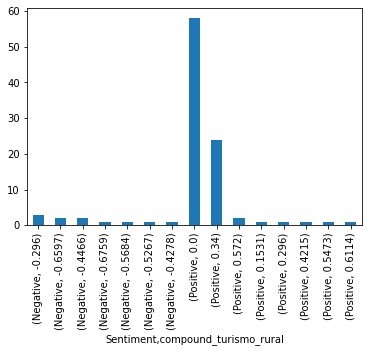

In [45]:


#Sample code snippet
#result=tweetdf_marketing_digital.groupby('compound_marketing_digital')['Sentiment'].value_counts().unstack()
#result[['Negative','Positive']].plot(kind='bar', 
#stacked=True, color='rb')

result=tweetdf_turismo_rural.groupby('Sentiment')['compound_turismo_rural'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_turismo_rural


,tweets_consultoría,compound_consultoría,Sentiment
0,MAÑANA Directo Especial 12HORAS comenzaremos a...,0.0000,Positive
1,RT @AlianzaValores: 🇦🇫Cierre de la ventana de ...,0.0000,Positive
2,RT @BattlefieldZona: Si llegamos a 200 Seguido...,0.0000,Positive
3,RT @JJMKTH_: ¿CÓMO HACEN PARA SUBIR TANTOS SEG...,-0.3736,Negative
4,RT @CrackyCrossing: 3 días #KEY_HateThat,0.0000,Positive
...,...,...,...
95,El señor de los anillos 1 2 3\n\nKEY SOLO IS B...,0.0000,Positive
96,@yxhsung_ Tuve que buscar según mi signo😂 pero...,0.0000,Positive
97,invierno aunque diga me congelo cada 3 minutos...,0.0000,Positive
98,responde por separado 3 películas\n\nKEY SOLO ...,0.0000,Positive


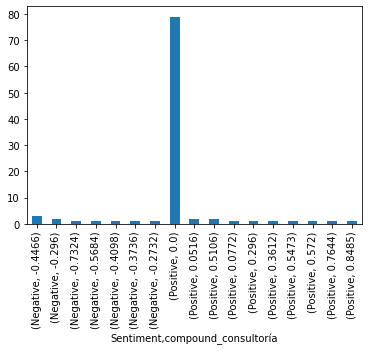

In [46]:
result=tweetdf_consultoría.groupby('Sentiment')['compound_consultoría'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_consultoría

,tweets_gestión_turística,compound_gestión_turística,Sentiment
0,#ヴァイナルミュージック #BertieHiggins\nKey Largo\nhttps:...,0.00,Positive
1,RT @ARMYForce_Peru: 💗 #BUTTERTHEEREMIXToday 💗\...,0.00,Positive
2,Primera vez haciendo 1 pieza de key art en ser...,0.00,Positive
3,RT @ARMYPeru_backup: [INFO]@BTS_twt \n\nButter...,0.34,Positive
4,RT @savagemapache: ENTRA A VERME EN DIRECTO 👇👇...,0.00,Positive
...,...,...,...
95,10a de SIS 1° DIVAN PLATEADO (4) con ALZAME...,0.00,Positive
96,RT @jinstteok: DINÁMICA ⚠️\n\nEn unas horas ci...,0.00,Positive
97,7a de SIS 1° YUTO BATARAZ KEY (6) con CORIA...,0.00,Positive
98,RT @EncuenPorLaRep: 📹 Video de fotos en torno ...,0.00,Positive


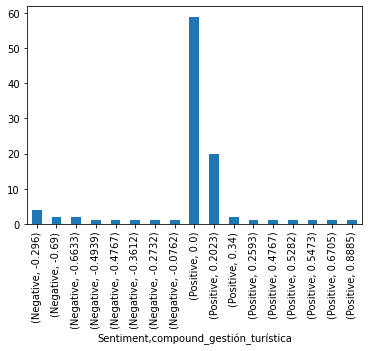

In [47]:
result=tweetdf_gestión_turística.groupby('Sentiment')['compound_gestión_turística'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_gestión_turística

,tweets_consultoría_turística,compound_consultoría_turística,Sentiment
0,RT @ARMYForce_Peru: 💗 #BUTTERTHEEREMIXToday 💗\...,0.0000,Positive
1,@BaJumVFX https://t.co/JHG7zQesvY 5 euro,0.0000,Positive
2,Participo como autor invitado en esta agencia....,0.0000,Positive
3,@danny8002 Haciendo pausas activas cada 5 minu...,0.0000,Positive
4,"Tras años de resistencia, los miembros del Gru...",0.0000,Positive
...,...,...,...
95,Sábado 28 celebraremos los 11 años de la etern...,-0.5267,Negative
96,Forza Horizon 5 CD Key: https://t.co/vAg7opqN6L,0.0000,Positive
97,"Mi conversación con mi hermana de 5 años , pre...",0.0000,Positive
98,@SofaB69 @Idontknow__a ?? Pero si blink empezó...,0.0000,Positive


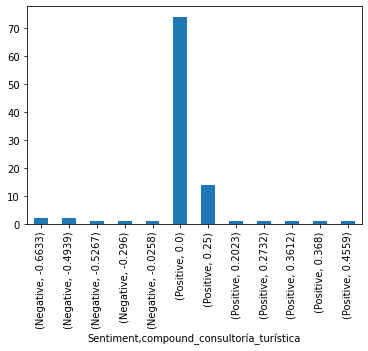

In [48]:
result=tweetdf_consultoría_turística.groupby('Sentiment')['compound_consultoría_turística'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_consultoría_turística

,tweets_tweets_turismo,compound_tweets_turismo,Sentiment
0,RT @AotVisuaIs: Levi Ackerman \nhttps://t.co/o...,0.0000,Positive
1,【 DEL 】KEY MASTER https://t.co/HTeFmKC4wN,0.0000,Positive
2,RT @Sporf: 🇵🇹 @B_Fernandes8 was key in @Cristi...,-0.1531,Negative
3,RT @ByTedx: SORTEO DE KEY DEL Dead By Daylight...,-0.6486,Negative
4,MAÑANA Directo Especial 12HORAS comenzaremos a...,0.0000,Positive
...,...,...,...
95,RT @GSka83: Espero las metas se superen y por ...,0.0000,Positive
96,RT @SoompiSpanish: #Key de #SHINee y #Taeyeon ...,-0.1779,Negative
97,RT @Sporf: 🇵🇹 @B_Fernandes8 was key in @Cristi...,-0.1531,Negative
98,"RT @brlockeandkey: Reunindo ""Cenas // Bastidor...",0.0000,Positive


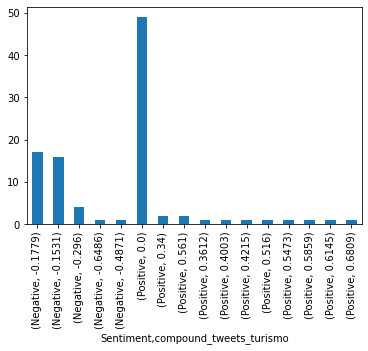

In [49]:
result=tweetdf_tweets_turismo.groupby('Sentiment')['compound_tweets_turismo'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_tweets_turismo

